In [90]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt, rc

rc('figure', figsize=(12,8))
rc('font', size=16)
rc('lines', linewidth=3)
rc('axes', linewidth=2)
rc('xtick.major', width=2)
rc('ytick.major', width=2)

In [11]:
mp = 1.6726e-27
sb = 5.6704e-8
c = 2.9979e8
G = 6.6743e-11
Msol = 1.9891e30
xs_thomson = 6.6524e-29

def T(mass, eta, mdot, r):
    return (mp * c**5 / (16 * G * mass * Msol * sb * xs_thomson * eta) * (mdot / r**3))**(1/4)

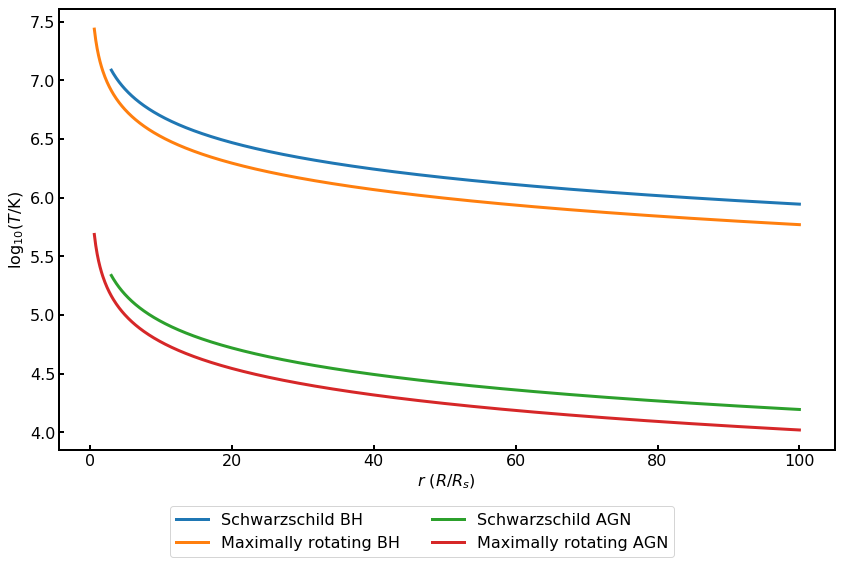

In [92]:
r_schwarzschild = np.linspace(3, 100, 971)
eta_schwarzschild = 1 / 12

r_maxrot = np.linspace(0.6, 100, 995)
eta_maxrot = 5 / 12

T_bh_ss = T(10, eta_schwarzschild, 1, r_schwarzschild)
T_bh_mr = T(10, eta_maxrot, 1, r_maxrot)
T_agn_ss = T(10**8, eta_schwarzschild, 1, r_schwarzschild)
T_agn_mr = T(10**8, eta_maxrot, 1, r_maxrot)

fig = plt.figure()
ax = plt.gca()
ax.tick_params(axis='both', direction='in', length=5)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0 + 0.2 * box.height,
#                 box.width, box.height])
ax.set_xlabel('$r\ (R/R_s)$')
ax.set_ylabel(r'$\log_{10}(T/\mathrm{K})$')

l1 = ax.plot(r_schwarzschild, np.log10(T_bh_ss), label='Schwarzschild BH')
l2 = ax.plot(r_maxrot, np.log10(T_bh_mr), label='Maximally rotating BH')
l3 = ax.plot(r_schwarzschild, np.log10(T_agn_ss), label='Schwarzschild AGN')
l4 = ax.plot(r_maxrot, np.log10(T_agn_mr), label='Maximally rotating AGN')
fig.legend(loc='lower center', ncol=2)
plt.tight_layout(rect=[0,0.1,1,1])
plt.savefig('parte_plot.pdf')